In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import joblib
from functions import print_prediction

# Segmentação por cores com K-Means


## Usando múltiplas imagens

In [3]:
# Cria listas com as imagens e seu reshape
path = '../images/clear_images/'
images = []
reshaped_images = []
with open('../images/separated_labels/clear.csv') as file:
    lines = file.readlines()
    for index, line in enumerate(lines):
        image_path = path + line.split(',')[0] + '.jpg'
        image = mpl.image.imread(image_path)
        images.append(image)
        reshaped_images.append(image.reshape(-1,4))
        if index == 10000:
            break


In [4]:
reshaped_images[0]

array([[ 47,  61,  55, 255],
       [ 51,  63,  56, 255],
       [ 56,  67,  59, 255],
       ...,
       [ 86,  92,  74, 255],
       [ 93,  97,  80, 255],
       [ 99, 101,  84, 255]], dtype=uint8)

In [5]:
combined_pixels = np.vstack(reshaped_images)

In [6]:
# Treinando o modelo
# kmeans = KMeans(n_clusters=5, n_init=10)
# kmeans.fit(combined_pixels)

KMeans(n_clusters=5, n_init=10)

In [57]:
# Salvando o modelo
# import joblib
# joblib.dump(kmeans, 'kmeans_model.pkl')

In [93]:
# Carregando o modelo salvo
kmeans = joblib.load('kmeans_model.pkl')

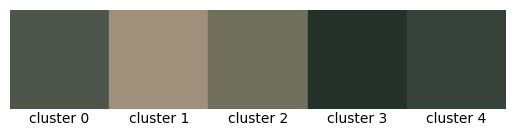

In [94]:
labels = set(kmeans.labels_)

# Plotting
fig, ax = plt.subplots()

# Plot de quadrados com a cor de cada cluster
for label, center in zip(labels, kmeans.cluster_centers_):
    color = [c / 255. for c in center[:3]]  # Normaliza os valores entre [0,1]
    square = plt.Rectangle((label * 100, 0), 100, 100, color=color)
    ax.add_patch(square)

    subtitle = f'cluster {label}' # Concatenate RGB values
    ax.text(label * 100 + 50, -10, subtitle, ha='center', va='center', color='black')

# Set plot limits and aspect
ax.set_xlim(0, len(labels) * 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal', 'box')

# Remove axes
ax.axis('off')

plt.show()

Cluster 4: 59.82%
Cluster 0: 28.34%
Cluster 2: 6.64%
Cluster 3: 4.82%
Cluster 1: 0.38%


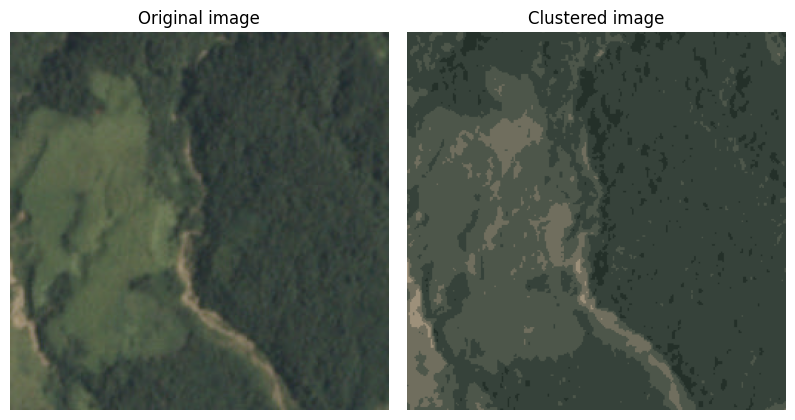

In [100]:
print_prediction('../images/clear_images/train_1.jpg', kmeans)

Cluster 3: 85.07%
Cluster 4: 6.33%
Cluster 0: 5.13%
Cluster 2: 3.41%
Cluster 1: 0.05%


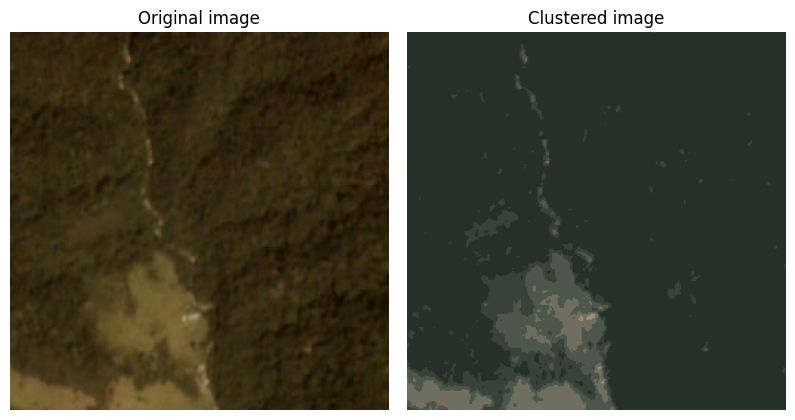

In [97]:
print_prediction('../images/clear_images/train_4.jpg', kmeans)

Cluster 0: 73.51%
Cluster 2: 13.48%
Cluster 1: 9.83%
Cluster 4: 3.17%


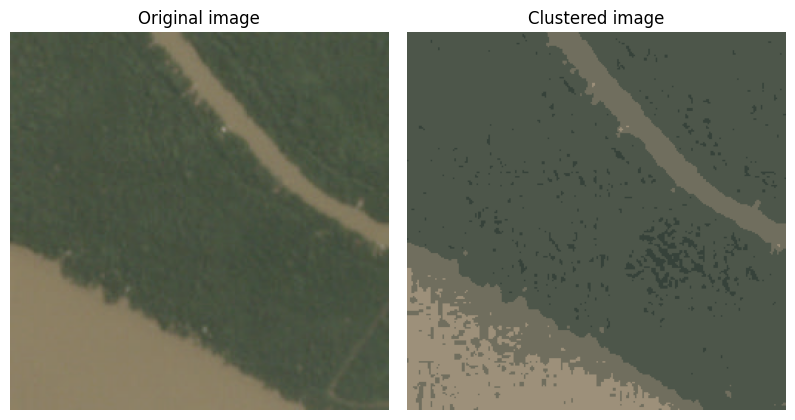

In [98]:
print_prediction('../images/clear_images/train_39888.jpg', kmeans)

Cluster 2: 66.93%
Cluster 0: 31.41%
Cluster 1: 1.65%
Cluster 4: 0.01%


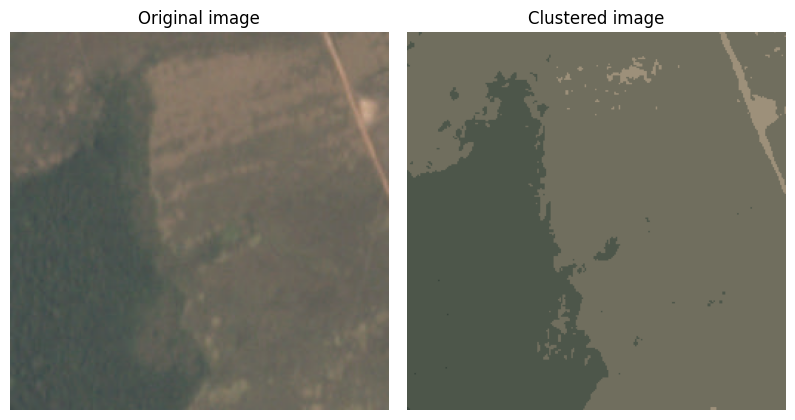

In [99]:
print_prediction('../images/clear_images/train_350.jpg', kmeans)